In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_result_updated.csv')

In [3]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df.head()

,price,price/m,rooms,city,district,street,status,meters,apartment_floors,bathroom,...,market,building,material,year,adv_date,upvotes,floor,building_floors,bedroom,balcony
0,360185,4002,4,Gdańsk,Łostowice,Kryształowa,Do wykończenia,90.00,2,2,...,Pierwotny,Dom wielorodzinny,Pustak,2025,2024-03-21,766,2,2,1,Nie
1,2850000,22266,4,Sopot,Dolny,Grunwaldzka,NaN,128.00,1,1,...,Wtórny,Kamienica,Cegła,1920,2023-09-18,383,1,3,5,Nie
2,669000,16405,2,Gdynia,Redłowo,Bohaterów Starówki Warszawskiej,NaN,40.78,1,1,...,Wtórny,Blok Mieszkalny,Wielka płyta,1970,2024-02-27,309,3,9,1,Tak
3,414000,11948,2,Gdańsk,Jasień,NaN,Do wykończenia,34.65,1,1,...,Pierwotny,Blok,Wielka płyta,2023,2024-06-12,233,1,4,1,Tak
4,537365,8550,4,Gdańsk,Ujeścisko - Łostowice,NaN,Do wykończenia,62.85,1,2,...,Pierwotny,Blok,Cegła,2024,2024-06-03,230,1,3,1,Tak


## Wizualizacja najważniejszych zależności wynikających z Eksploracyjnej Analizy Danych przeprowadzonej w SQL

In [4]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set_style("whitegrid")
sns.set_palette(palette="viridis")

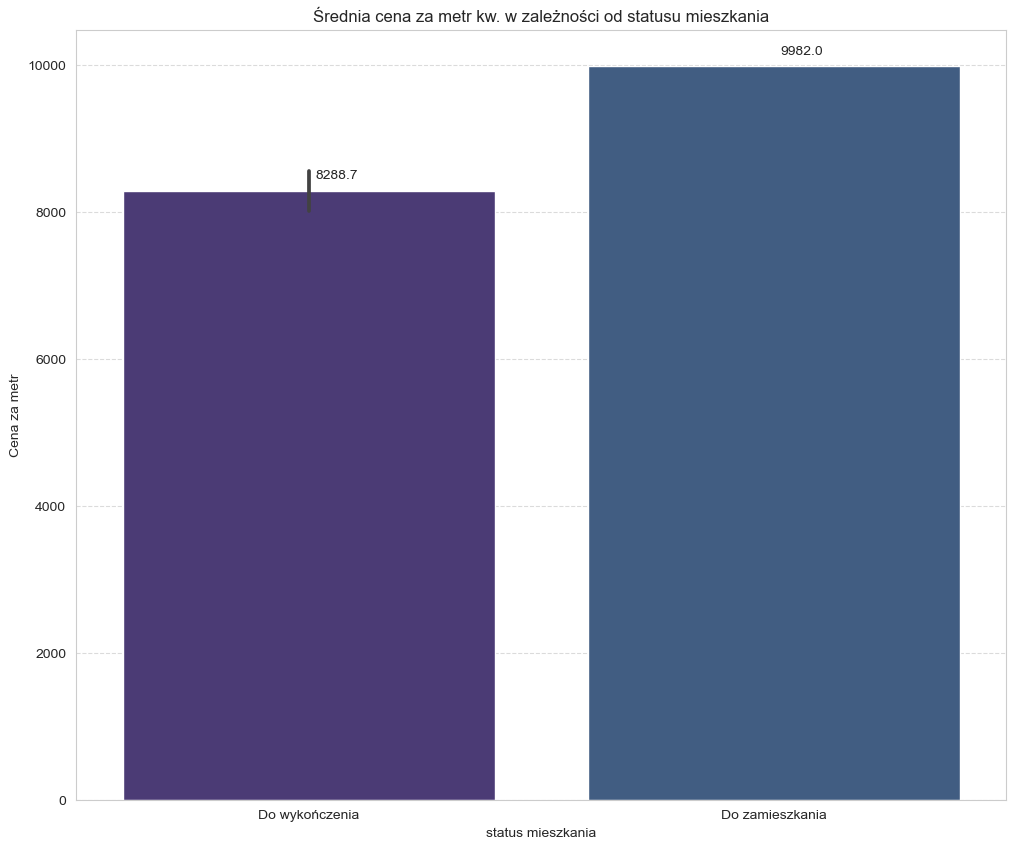

In [5]:
barplot = sns.barplot(df, x='status', y='price/m')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     xytext = (5, 9), 
                     textcoords = 'offset points')
plt.title('Średnia cena za metr kw. w zależności od statusu mieszkania')
plt.xlabel('status mieszkania')
plt.ylabel('Cena za metr')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Zgodnie z intuicją mieszkania dodatkowo wymagające wykończenia są tańsze

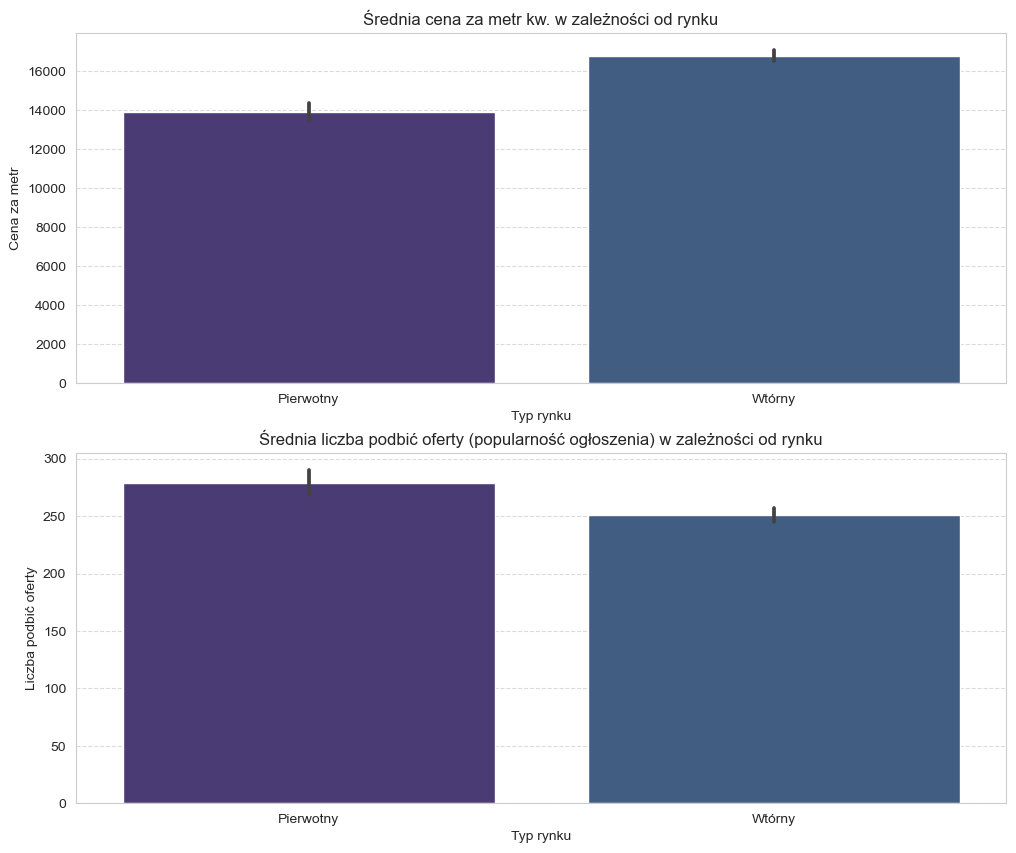

In [6]:
fig, axs = plt.subplots(2, 1)
sns.barplot(df, x='market', y='price/m', ax=axs[0])
axs[0].set_title('Średnia cena za metr kw. w zależności od rynku')
axs[0].set_xlabel('Typ rynku')
axs[0].set_ylabel('Cena za metr')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.barplot(df, x='market', y='upvotes', ax=axs[1])
axs[1].set_title('Średnia liczba podbić oferty (popularność ogłoszenia) w zależności od rynku')
axs[1].set_xlabel('Typ rynku')
axs[1].set_ylabel('Liczba podbić oferty')
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

##### Mieszkania z rynku pierwotnego są uśredniając tańsze od rynku wtórnego, tym samym popularność ogłoszeń ogłoszeń z rynku pierwotnego jest średnio większa, co może sugerować, że raczej ludzie szukają mieszkań tańszych z rynku pierwotnego

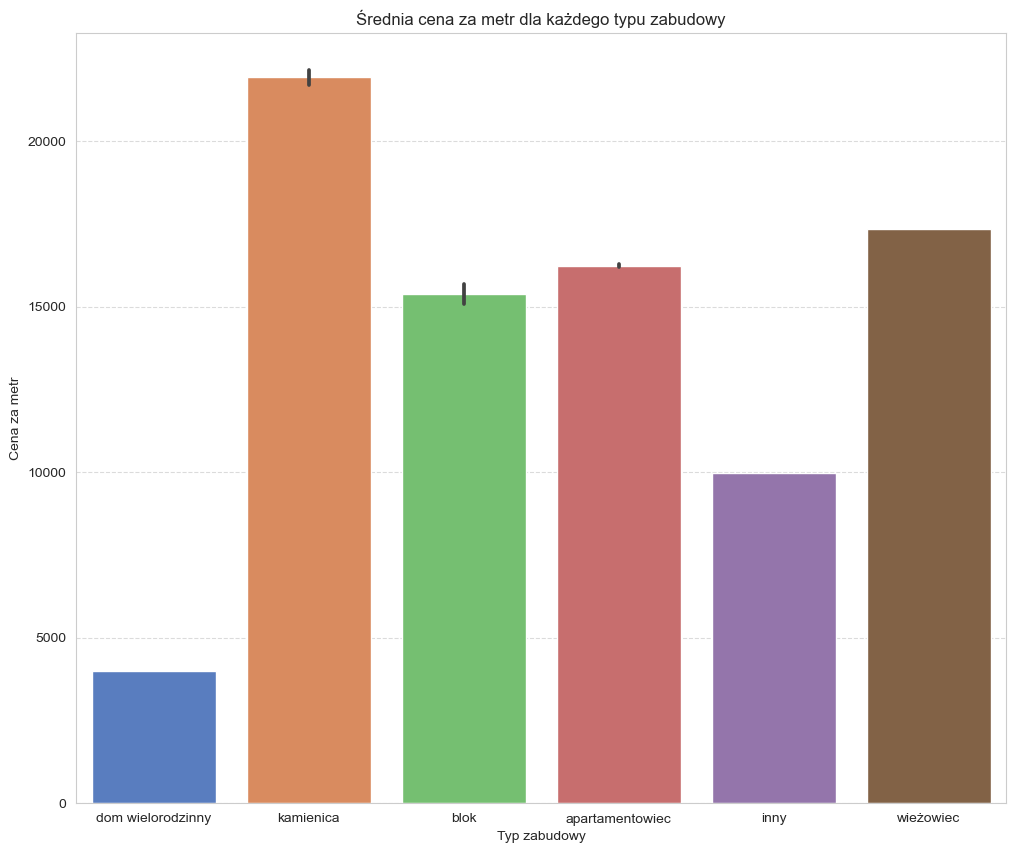

In [7]:
df['building'] = df['building'].replace('Blok Mieszkalny', 'Blok')
df['building'] = df['building'].str.lower()
sns.barplot(df, x='building', y='price/m', palette="muted")
plt.title('Średnia cena za metr dla każdego typu zabudowy')
plt.ylabel('Cena za metr')
plt.xlabel('Typ zabudowy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Najdroższym typem zabudowy są kamienice

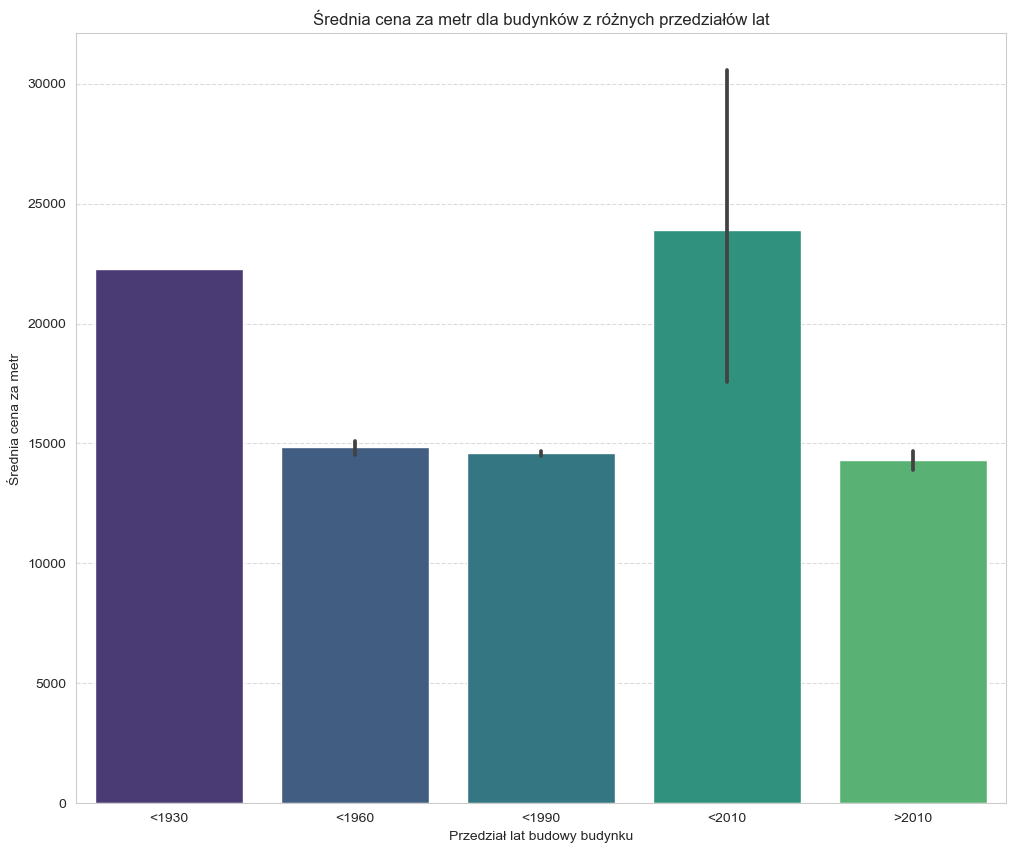

In [8]:
df['years_bins'] = pd.cut(df['year'],
                       [0,1930,1960,1990,2010,np.inf],
                       right=False,
                       labels=['<1930','<1960','<1990','<2010','>2010'])

sns.barplot(df, x='years_bins', y='price/m')
plt.title('Średnia cena za metr dla budynków z różnych przedziałów lat')
plt.ylabel('Średnia cena za metr')
plt.xlabel('Przedział lat budowy budynku')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#### jedne z droższych mieszkań znajdują się w budynkach sprzed 1930 roku, a najdroższą zabudową są kamienice co idzie w parze. najdroższe mieszkania to te z przedziału 1990-2010

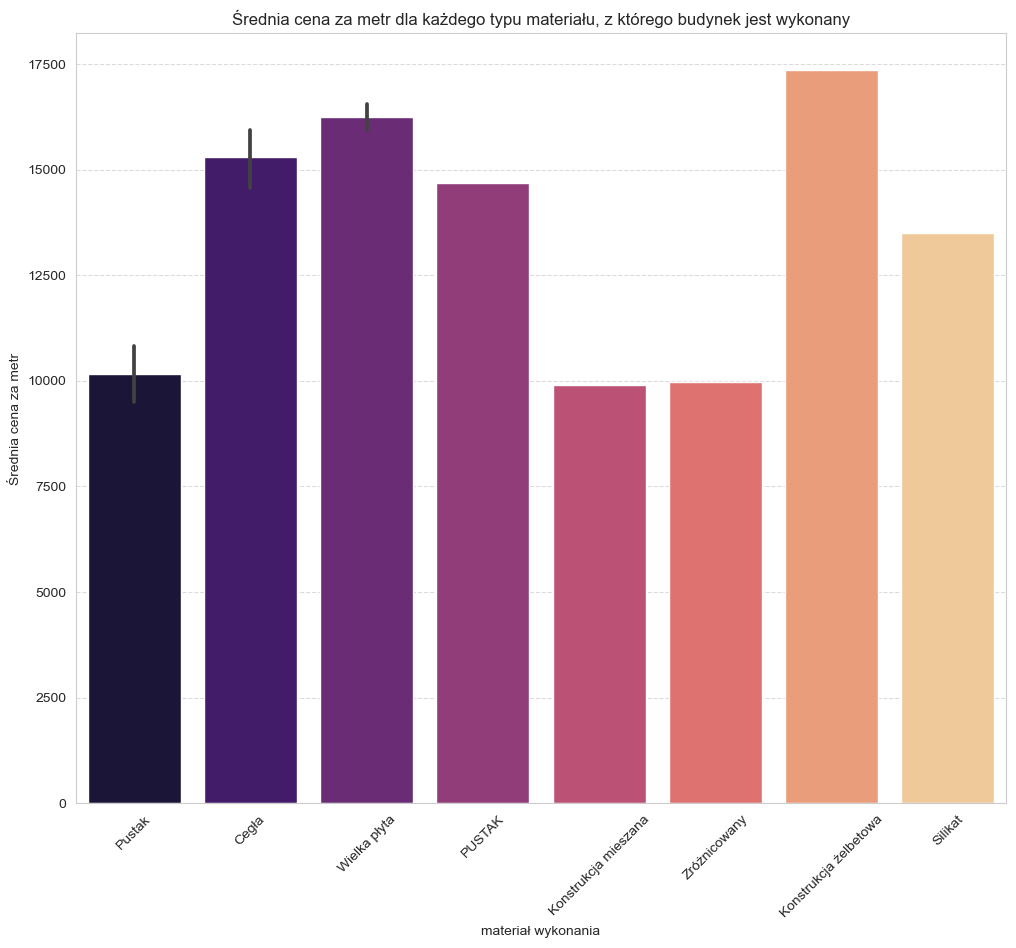

In [9]:
sns.barplot(df, x='material', y='price/m', palette="magma")
plt.xticks(rotation=45)
plt.title('Średnia cena za metr dla każdego typu materiału, z którego budynek jest wykonany')
plt.xlabel('materiał wykonania')
plt.ylabel('Średnia cena za metr')
plt.grid(axis='y', linestyle='--', alpha=0.7)

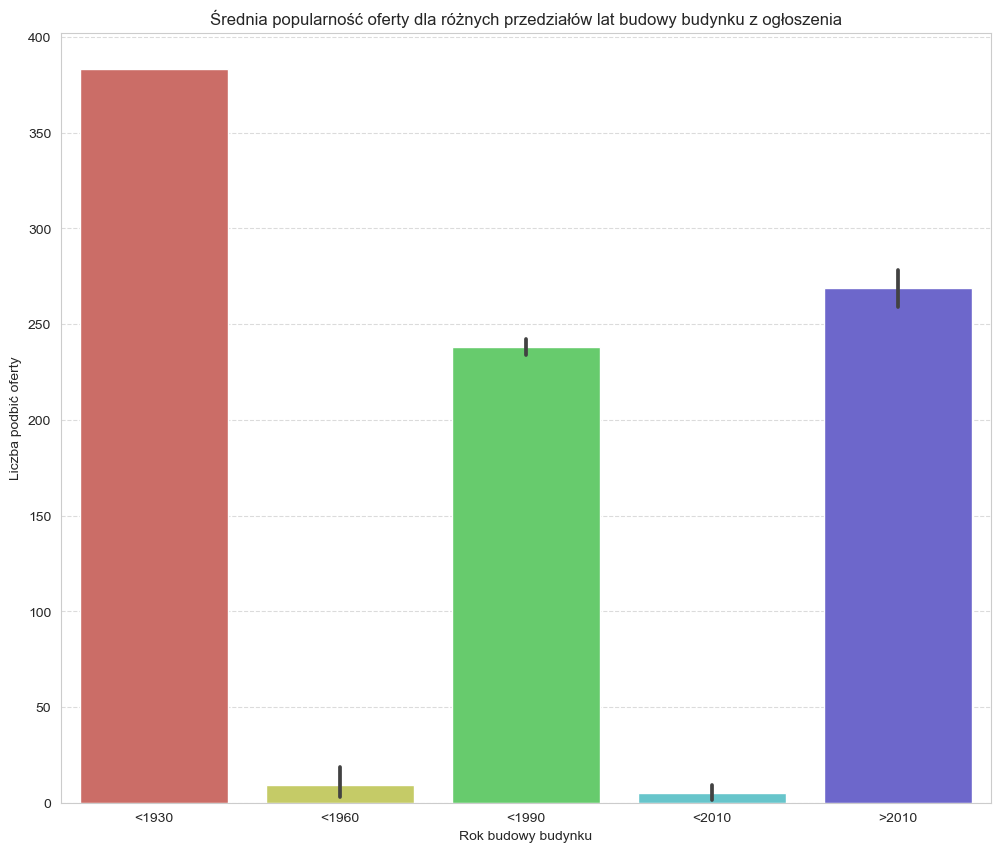

In [10]:
sns.set_palette(palette='hls')
sns.barplot(df, x='years_bins', y='upvotes')
plt.title('Średnia popularność oferty dla różnych przedziałów lat budowy budynku z ogłoszenia')
plt.xlabel('Rok budowy budynku')
plt.ylabel('Liczba podbić oferty')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Najpopularniejsze ogłoszenia, w badanym zbiorze danych, okazują się być wśród budynków najstarszych, które również są droższymi ofertami (jak pokazała wcześniejsza analiza) można wnioskować

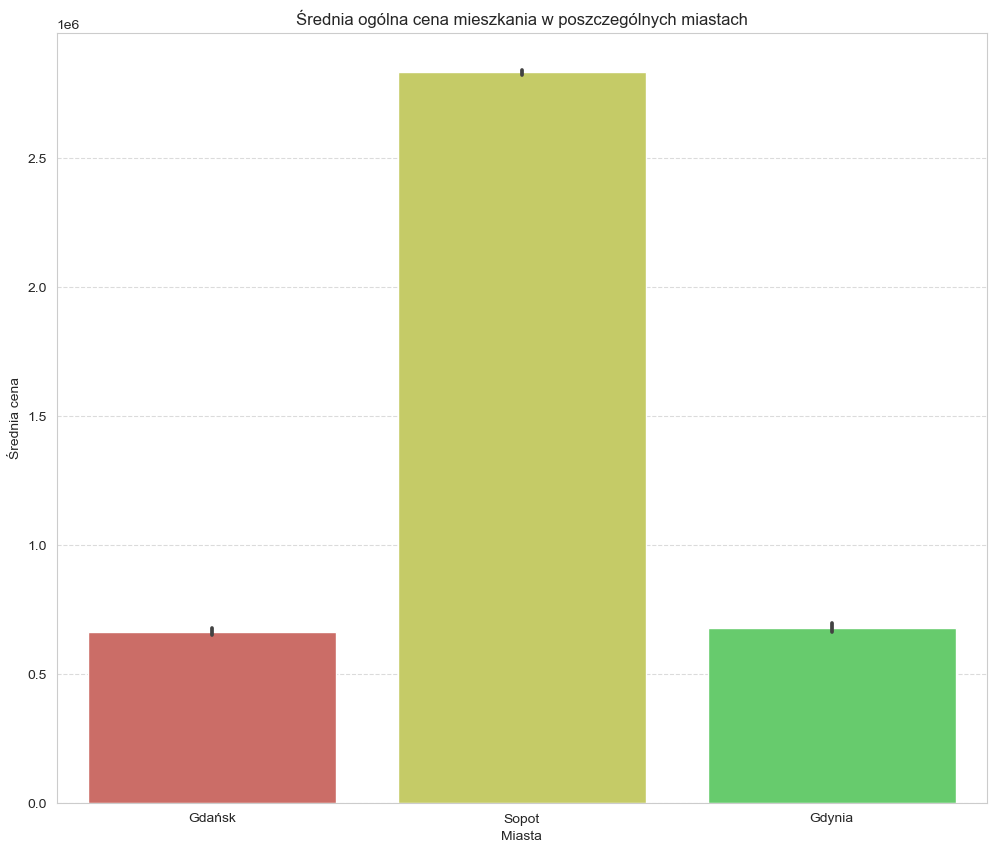

In [11]:
sns.barplot(df, x='city', y='price')
plt.title('Średnia ogólna cena mieszkania w poszczególnych miastach')
plt.xlabel('Miasta')
plt.ylabel('Średnia cena')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Średnia ogólna cena mieszkań w Gdańsku i Gdyni jest porównywalna, jednak są dużo niższe od mieszkań w Sopocie

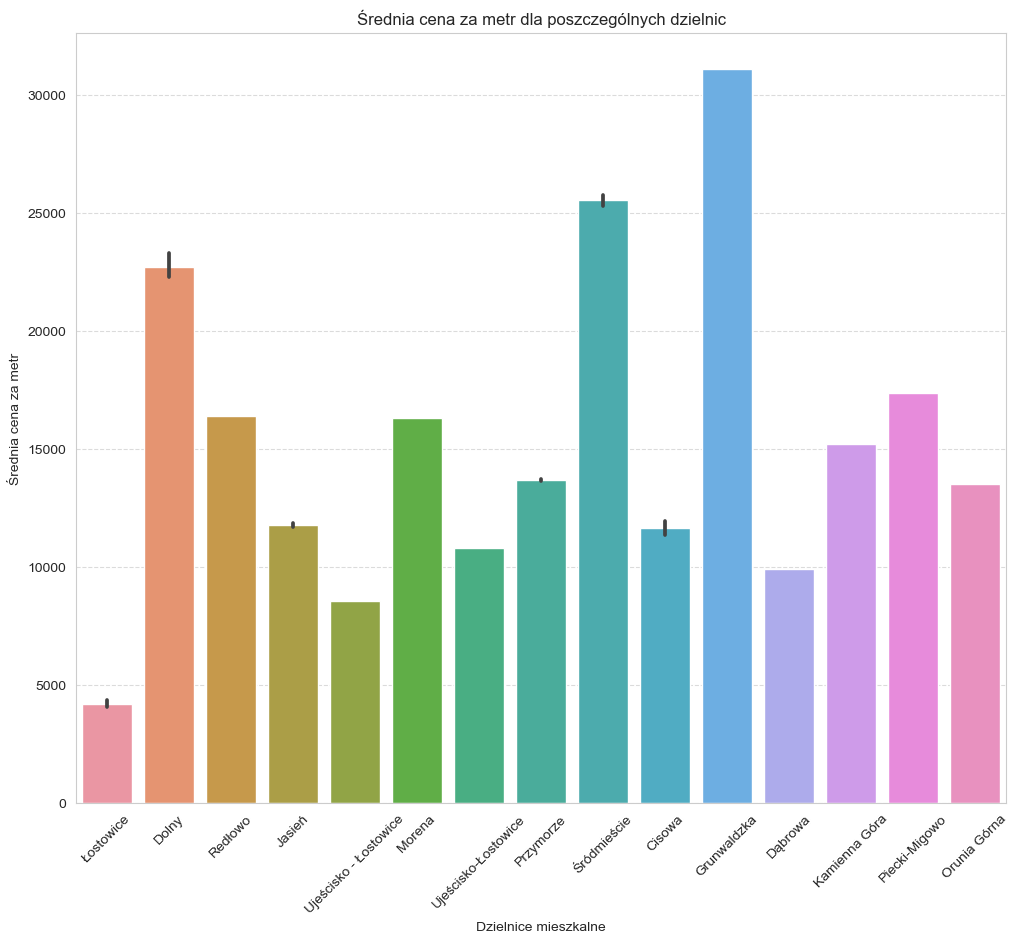

In [12]:
sns.barplot(df, x='district', y='price/m')
plt.xticks(rotation=45)
plt.title('Średnia cena za metr dla poszczególnych dzielnic')
plt.xlabel('Dzielnice mieszkalne')
plt.ylabel('Średnia cena za metr')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### najwyższa cena za metr jest dla dzielnic w kolejności: Grunwaldzka (Sopot), Śródmieście (Gdańsk) oraz Dolny Sopot, najtańsze dzielnice to: Ujeścisko-Łostowice, Dąbrowa, Łostowice.

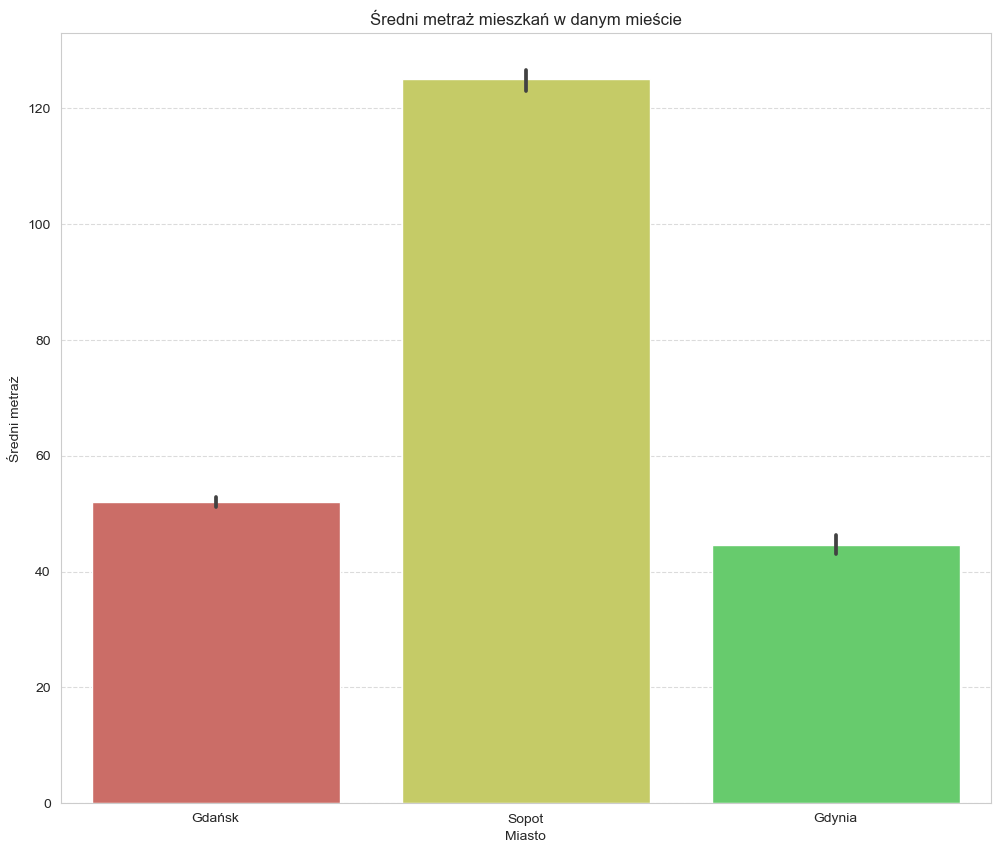

In [13]:
sns.barplot(df, y='meters', x='city')
plt.title('Średni metraż mieszkań w danym mieście')
plt.xlabel('Miasto')
plt.ylabel('Średni metraż')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Średni metraż mieszkań w Gdańsku i Gdyni jest porównywalny, jednak w Sopocie jest zauważalnie większy. Wykres jest bardzo podobny to wykresu przedstawiającego średnią ogólną cenę mieszkań w tych miastach. Podobny rozkład metrów kwadratowych w miastach daje podobny rozkład cen

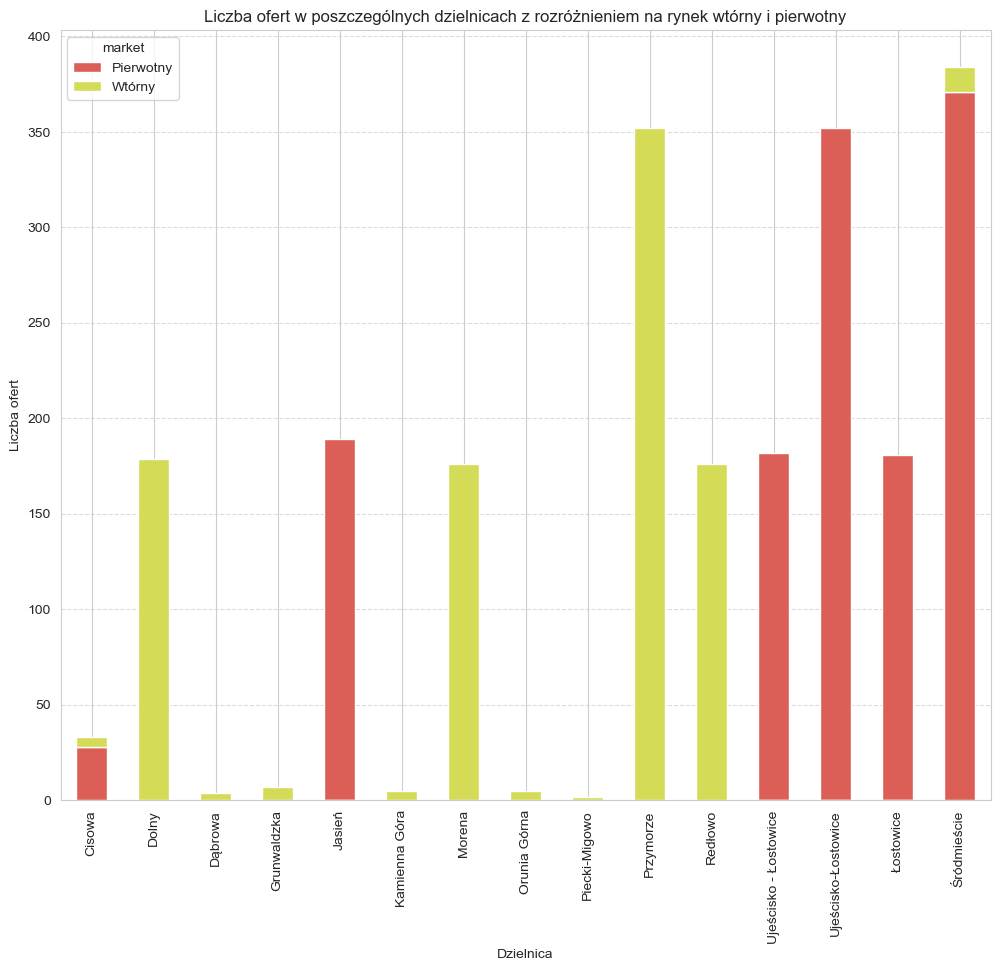

In [14]:
city_category_counts = df.groupby(['district', 'market']).size().unstack(fill_value=0)


city_category_counts.plot(kind='bar', stacked=True)


plt.title('Liczba ofert w poszczególnych dzielnicach z rozróżnieniem na rynek wtórny i pierwotny')
plt.xlabel('Dzielnica')
plt.ylabel('Liczba ofert')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Dzielnica z największą ilością mieszkań na sprzedaż to w większości mieszkania z rynku pierwotnego (nowe inwestycje deweloperskie)

Text(0.5, 1.0, 'Porównanie liczby ofert z rynku wtórnego do rynku pierwotnego')

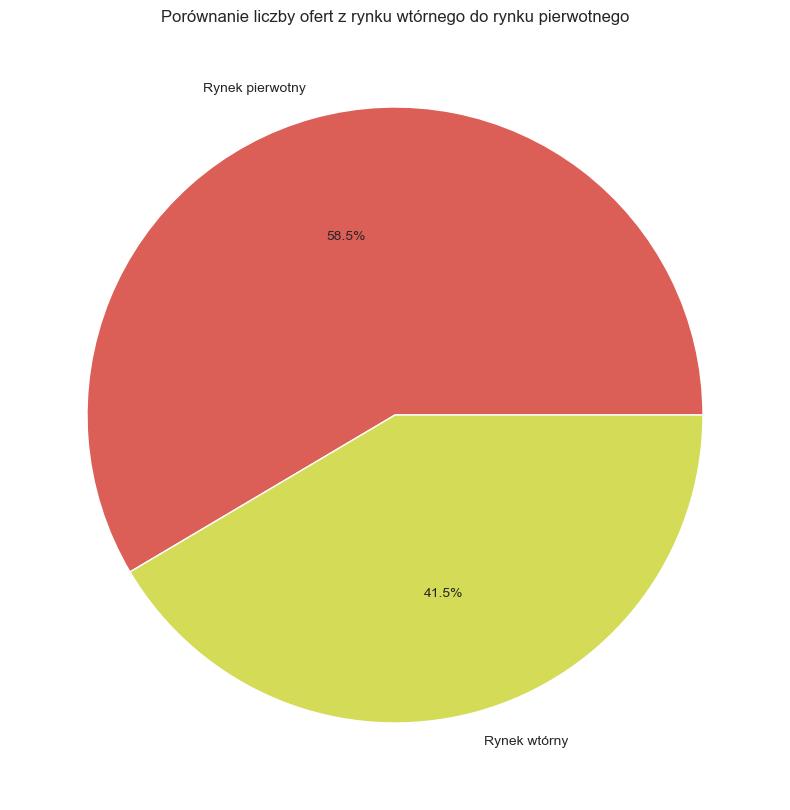

In [15]:
plt.pie(df['market'].value_counts(), labels=['Rynek pierwotny', 'Rynek wtórny'], autopct='%1.1f%%')
plt.title('Porównanie liczby ofert z rynku wtórnego do rynku pierwotnego')

##### W zebranym zbiorze danych można zauważyć nieznaczną przewagę ofert mieszkań z rynku pierwotnego nad rynkiem wtórnym